# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | porto novo
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | coahuayana de hidalgo
Processing Record 9 of Set 1 | tenenkou
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | taltal
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | alagoinhas
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | pervomayskoye
Processing Record 21 of Set 1 | hassi messaoud
P

Processing Record 36 of Set 4 | mossel bay
Processing Record 37 of Set 4 | margaret river
Processing Record 38 of Set 4 | san jose de jachal
Processing Record 39 of Set 4 | mirny
Processing Record 40 of Set 4 | leava
Processing Record 41 of Set 4 | banda aceh
Processing Record 42 of Set 4 | arkalyk
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | ulladulla
Processing Record 45 of Set 4 | port saint john's
Processing Record 46 of Set 4 | mahriz
Processing Record 47 of Set 4 | west island
Processing Record 48 of Set 4 | utrik
Processing Record 49 of Set 4 | kingston
Processing Record 0 of Set 5 | sucua
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | balsas
Processing Record 3 of Set 5 | ares
Processing Record 4 of Set 5 | ravar
Processing Record 5 of Set 5 | bairnsdale
Processing Record 6 of Set 5 | port moresby
Processing Record 7 of Set 5 | bamboo flat
Processing Record 8 of Set 5 | shevchenko
Processing Record 9 of Set 5 | freetown


Processing Record 25 of Set 8 | turuntayevo
Processing Record 26 of Set 8 | hafar al-batin
Processing Record 27 of Set 8 | tynda
Processing Record 28 of Set 8 | beau vallon
Processing Record 29 of Set 8 | colonia
Processing Record 30 of Set 8 | fort st. john
Processing Record 31 of Set 8 | kulhudhuffushi
Processing Record 32 of Set 8 | padangsidempuan
Processing Record 33 of Set 8 | matoury
Processing Record 34 of Set 8 | mount pearl
Processing Record 35 of Set 8 | joshimath
Processing Record 36 of Set 8 | beaufort
Processing Record 37 of Set 8 | funafuti
Processing Record 38 of Set 8 | dzilam gonzalez
Processing Record 39 of Set 8 | caraballeda
Processing Record 40 of Set 8 | kristiansund
Processing Record 41 of Set 8 | kidal
Processing Record 42 of Set 8 | plastun
Processing Record 43 of Set 8 | lebu
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | eydhafushi
Processing Record 46 of Set 8 | newman
Processing Record 47 of Set 8 | noyabrsk
Processing Record 

Processing Record 13 of Set 12 | weno
Processing Record 14 of Set 12 | san antonio
Processing Record 15 of Set 12 | atrauli
Processing Record 16 of Set 12 | namibe
Processing Record 17 of Set 12 | wabag
Processing Record 18 of Set 12 | cockburn town
Processing Record 19 of Set 12 | olmos
Processing Record 20 of Set 12 | kismayo
Processing Record 21 of Set 12 | beltran
Processing Record 22 of Set 12 | khorinsk
Processing Record 23 of Set 12 | prainha
Processing Record 24 of Set 12 | keetmanshoop
Processing Record 25 of Set 12 | carnarvon
Processing Record 26 of Set 12 | sinabang
Processing Record 27 of Set 12 | nar'yan-mar
Processing Record 28 of Set 12 | cuntis
Processing Record 29 of Set 12 | prachuap khiri khan
Processing Record 30 of Set 12 | goure
Processing Record 31 of Set 12 | cam ranh
Processing Record 32 of Set 12 | rongelap
Processing Record 33 of Set 12 | crucecita
Processing Record 34 of Set 12 | kurumkan
Processing Record 35 of Set 12 | soledade
Processing Record 36 of Set

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,0.53,65,100,9.32,SJ,1700865902
1,atafu village,-8.5421,-172.5159,27.45,78,100,6.51,TK,1700865903
2,badger,64.8000,-147.5333,-4.80,85,0,0.00,US,1700865905
3,waitangi,-43.9535,-176.5597,15.46,98,100,7.30,NZ,1700865767
4,porto novo,6.4965,2.6036,27.90,82,100,3.19,BJ,1700865744


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,0.53,65,100,9.32,SJ,1700865902
1,atafu village,-8.5421,-172.5159,27.45,78,100,6.51,TK,1700865903
2,badger,64.8000,-147.5333,-4.80,85,0,0.00,US,1700865905
3,waitangi,-43.9535,-176.5597,15.46,98,100,7.30,NZ,1700865767
4,porto novo,6.4965,2.6036,27.90,82,100,3.19,BJ,1700865744


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

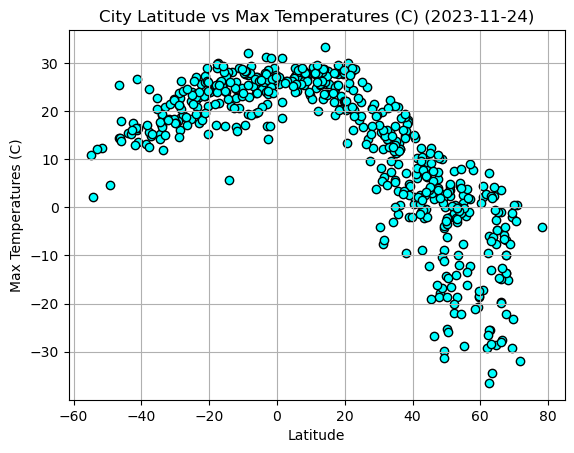

In [31]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.title("City Latitude vs Max Temperatures (C) (2023-11-24)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

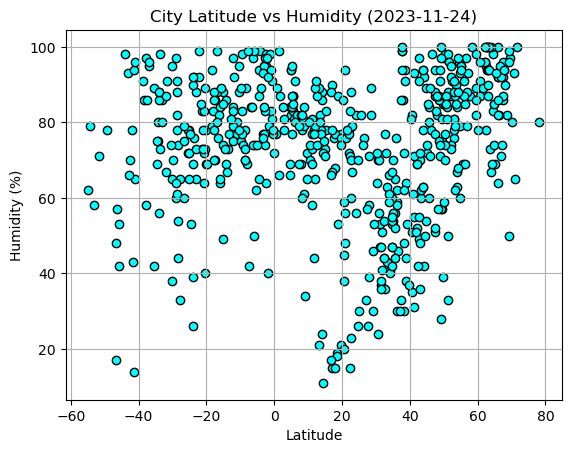

In [32]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-11-24)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

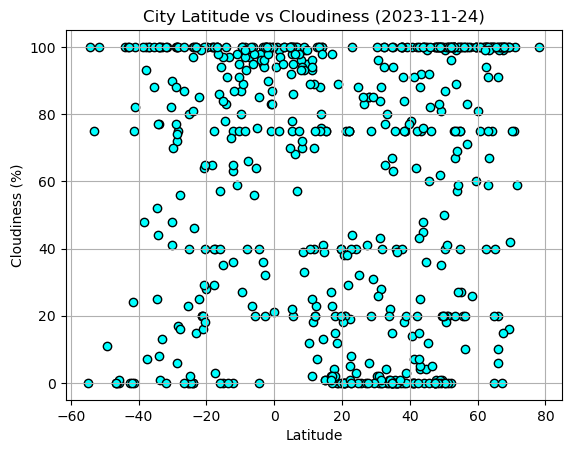

In [33]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-11-24)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

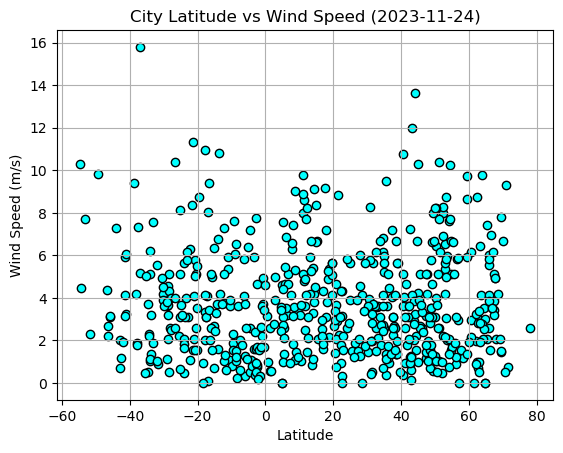

In [34]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis,marker = 'o',facecolors = "cyan",edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-11-24)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def city_linregress(city):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis,y_axis)
    

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE